In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('temperature_dataSet.csv', sep=',')
print(data)

     % visibilidad del sol  nro minuto  nro mes  temperatura
0                     0.59       989.0      5.0         14.0
1                     0.11      1294.0     10.0          3.0
2                     0.39      1093.0      1.0          1.0
3                     0.64       736.0      3.0         25.0
4                     0.60      1016.0     11.0         13.0
..                     ...         ...      ...          ...
495                   0.78       919.0     10.0         10.0
496                   0.27      1309.0      9.0          9.0
497                   0.55      1044.0      3.0         13.0
498                   0.78       909.0     10.0         14.0
499                   0.01       189.0      1.0         10.0

[500 rows x 4 columns]


In [11]:
p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
data = data.drop('is_train', 1)
print(train)
print(test)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

train.to_csv('train_temperatura.csv')
test.to_csv('test_temperatura.csv')


     % visibilidad del sol  nro minuto  nro mes  temperatura  is_train
0                     0.59       989.0      5.0         14.0      True
1                     0.11      1294.0     10.0          3.0      True
2                     0.39      1093.0      1.0          1.0      True
3                     0.64       736.0      3.0         25.0      True
4                     0.60      1016.0     11.0         13.0      True
..                     ...         ...      ...          ...       ...
493                   0.00      1107.0      1.0          5.0      True
494                   0.55       889.0     11.0         18.0      True
495                   0.78       919.0     10.0         10.0      True
496                   0.27      1309.0      9.0          9.0      True
498                   0.78       909.0     10.0         14.0      True

[344 rows x 5 columns]
     % visibilidad del sol  nro minuto  nro mes  temperatura  is_train
7                     0.58       838.0      3.0      

In [12]:
train = pd.read_csv('train_temperatura.csv')
test = pd.read_csv('test_temperatura.csv')


X_train = train.iloc[:, 1:4]
y_train = train.iloc[:,4]

X_test = test.iloc[:, 1:4]
y_test = test.iloc[:,4]

#print(X_train)
#print(y_train)


In [13]:
X_media = np.concatenate((X_train, X_test), axis=0).mean(axis=0)
X_std = np.concatenate((X_train, X_test), axis=0).std(axis=0)
y_media = np.concatenate((y_train, y_test), axis=0).mean()
y_std = np.concatenate((y_train, y_test), axis=0).std()

In [14]:
X_train = (X_train - X_media)/X_std
y_train = (y_train - y_media)/y_std
X_test = (X_test - X_media)/X_std
y_test = (y_test - y_media)/y_std

print(X_train.shape)

(344, 3)


In [15]:
n_exa_train = len(y_train)
n_exa_test = len(y_test)

X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)

print(X_train.shape)
print(X_train)

(344, 4)
[[ 1.          0.24215995  0.60114624 -0.39674887]
 [ 1.         -1.6005283   1.58073486  0.83692298]
 [ 1.         -0.52562682  0.9351699  -1.38368634]
 ...
 [ 1.          0.97155738  0.37632262  0.83692298]
 [ 1.         -0.98629889  1.62891135  0.59018861]
 [ 1.          0.97155738  0.34420496  0.83692298]]


In [16]:
def predict(theta, data):
    return np.dot(data, theta)
# print(predict(theta, X_train).shape)


In [17]:
# m = X.shape[0]

def cal_cost(theta, X, y):
    y_pred_test = predict(theta, X)
    to_sum = (y_pred_test - y) ** 2
    return np.sum(to_sum) / (X.shape[0]*2)

In [18]:
def gradient_descent(X,y, alpha, iterations):
    cost_history = np.zeros(iterations)
    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    
    for it in range(iterations):
        prediction = predict(theta, X)
        # m = prediction.shape[0]
        theta = theta - (1/prediction.shape[0])*alpha*( X.T.dot((prediction - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history


In [19]:
def normal_equation(X, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    h_array = np.dot(X, theta)
    j = (1/(2*X.shape[0])) * np.sum((h_array-y)**2)
    return theta,j

In [20]:
alpha = 0.01 # learning rate
iterations = 2000

theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iterations)
print(theta_r)

new_theta, j1 = normal_equation(X_train, y_train)
print(new_theta)

cost = cal_cost(theta_r,X_test, y_test)
print(cost)
print(j1)

[-0.03165939  0.74922956 -0.0076528   0.06523043]
[-0.03165939  0.74922957 -0.00765281  0.06523042]
0.19202891722277274
0.2054791771792598


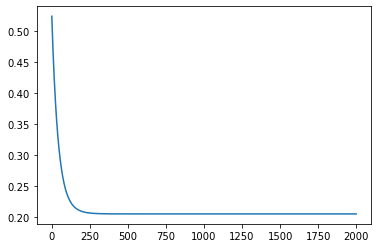

In [21]:
plt.plot(cost_history_r)
plt.show()

<h1>Experimentos</h1>

learning rate: 0.01, iteraciones:   500, costo gradiente: 0.20549349436173408590, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  1000, costo gradiente: 0.20547917967785414572, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  1500, costo gradiente: 0.20547917717973857021, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  2000, costo gradiente: 0.20547917717925986980, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  2500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  3000, costo gradiente: 0.20547917717925984205, costo normal: 0.20547917717925978653
learning rate: 0.01, iteraciones:  3500, costo gradiente: 0.20547917717925984205, costo normal: 0.20547917717925978653


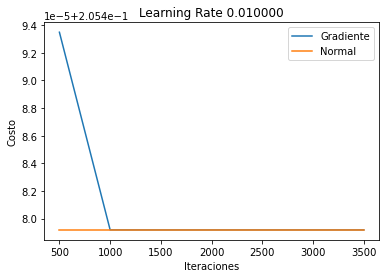

learning rate: 0.05, iteraciones:   500, costo gradiente: 0.20547917717925984205, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  1000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  1500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  2000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  2500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  3000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.05, iteraciones:  3500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653


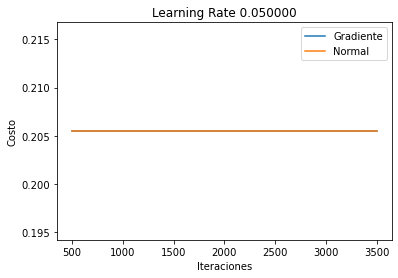

learning rate: 0.10, iteraciones:   500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  1000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  1500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  2000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  2500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  3000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.10, iteraciones:  3500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653


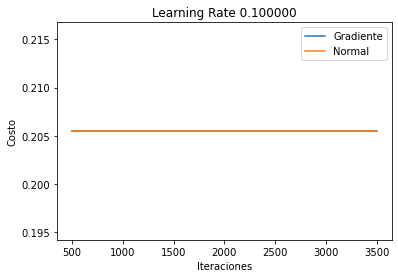

learning rate: 0.20, iteraciones:   500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  1000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  1500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  2000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  2500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  3000, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653
learning rate: 0.20, iteraciones:  3500, costo gradiente: 0.20547917717925978653, costo normal: 0.20547917717925978653


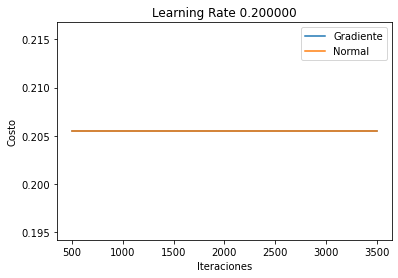

In [23]:
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
learning_rates = [0.01,0.05,0.1, 0.2]

n_features = X_train.shape[1]

for alpha in learning_rates:
    costos_gradiente = []
    costos_normal = []
    for iteracion in  iteraciones:
        #calcular gradiente
        theta_r, cost_history_r = gradient_descent(X_train, y_train, alpha, iteracion)
        costo_gradiente = cost_history_r[-1]
        
        #calcular normal
        theta_normal, costo_normal = normal_equation(X_train, y_train)
        
        costos_gradiente.append(costo_gradiente)
        costos_normal.append(costo_normal)
        print("learning rate: %1.2f, iteraciones: %5d, costo gradiente: %2.20f, costo normal: %2.20f"%(alpha,iteracion,costo_gradiente, costo_normal))
    
    plt.plot(iteraciones, costos_gradiente, label='Gradiente')
    plt.plot(iteraciones, costos_normal, label='Normal')
    plt.title('Learning Rate %f'%alpha)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()
